In [6]:
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

init_notebook_mode(connected=True)
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv('covid_19_india.csv')
df['country'] = 'India'
df.head()

Sno      Date     Time State/UnionTerritory ConfirmedIndianNational  \
0    1  30/01/20  6:00 PM               Kerala                       1   
1    2  31/01/20  6:00 PM               Kerala                       1   
2    3  01/02/20  6:00 PM               Kerala                       2   
3    4  02/02/20  6:00 PM               Kerala                       3   
4    5  03/02/20  6:00 PM               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed country  
0                        0      0       0          1   India  
1                        0      0       0          1   India  
2                        0      0       0          2   India  
3                        0      0       0          3   India  
4                        0      0       0          3   India

In [10]:
data = dict(type='choropleth',
            locations = ['india'],
            locationmode = 'country names',
            colorscale = 'Reds',
            text = ['Total Cases'],
            z = [df.groupby('State/UnionTerritory')['Confirmed'].max().sum()],
#             colorbar = {'title':"Stores Count"}
            )
layout = dict(title = 'Total COVID-19 Positive Cases in India',
              geo = dict(scope='asia')
             )
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

In [13]:
fig = px.bar(df, x="State/UnionTerritory", y="Confirmed", color='State/UnionTerritory', 
             color_continuous_scale=px.colors.sequential.Plasma, )
fig.show()

In [14]:
fig = px.line(df, x="Date", y="Confirmed", color='State/UnionTerritory')
fig.show()

In [15]:
fig = px.bar(df, x="Date", y="Confirmed", color='State/UnionTerritory')
fig.show()

In [16]:
fig = px.scatter(df, x="Date", y="Confirmed", color="State/UnionTerritory",
                 size='Confirmed', color_continuous_scale=px.colors.sequential.Plasma,)
fig.show()

In [17]:
fig = px.scatter(df, x='Date', y='Cured', color='State/UnionTerritory', title='Cases Cured').update_traces(mode='lines+markers')
fig.show()

In [19]:
fig = px.scatter(df, x='Date', y='Deaths', color='State/UnionTerritory', title='Deaths occured').update_traces(mode='lines+markers')
fig.show()

In [20]:
fig = px.scatter_matrix(df,
    dimensions=["Confirmed", "Cured"],
    color="State/UnionTerritory", title='Plot between Confirmed and Cured')
fig.show()
fig = px.scatter_matrix(df,
    dimensions=["Confirmed", "Deaths"],
    color="State/UnionTerritory", title='Plot between Confirmed and Deaths')
fig.show()

In [21]:
def div(x,y): 
    if y==0:
        return 0
    return x/y
df['mortality_rate'] = df.apply(lambda row: div(row['Deaths'], row['Confirmed']) , axis = 1)
fig = px.line(df, x="Date", y="mortality_rate", color='State/UnionTerritory')
fig.show()

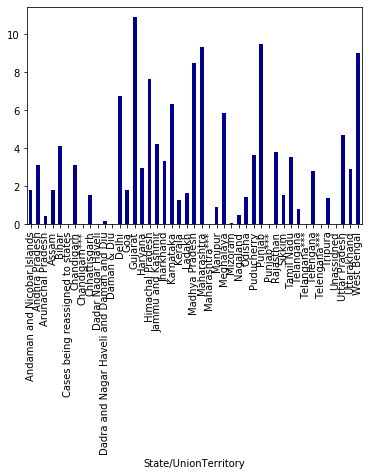

In [23]:
df.groupby('State/UnionTerritory')['mortality_rate'].sum().plot(kind='bar', color='darkblue')

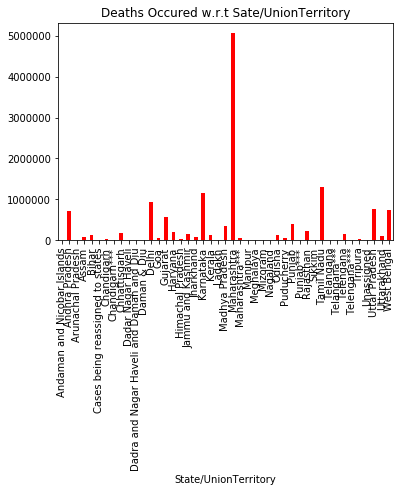

In [25]:
df.groupby('State/UnionTerritory')['Deaths'].sum().plot(kind='bar', color='red', title='Deaths Occured w.r.t Sate/UnionTerritory')

In [26]:
corr = df[['Confirmed', 'Cured', 'Deaths']].corr()
ff.create_annotated_heatmap(
    z=corr.values,
    x=list(corr.columns),
    y=list(corr.index),
    annotation_text=corr.round(2).values,
    showscale=True, colorscale='emrld')

In [28]:
covid_19_india=pd.read_csv('covid_19_india.csv',index_col='Date')
covid_19_india

Sno     Time State/UnionTerritory ConfirmedIndianNational  \
Date                                                                   
30/01/20     1  6:00 PM               Kerala                       1   
31/01/20     2  6:00 PM               Kerala                       1   
01/02/20     3  6:00 PM               Kerala                       2   
02/02/20     4  6:00 PM               Kerala                       3   
03/02/20     5  6:00 PM               Kerala                       3   
...        ...      ...                  ...                     ...   
09/12/20  9287  8:00 AM            Telengana                       -   
09/12/20  9288  8:00 AM              Tripura                       -   
09/12/20  9289  8:00 AM          Uttarakhand                       -   
09/12/20  9290  8:00 AM        Uttar Pradesh                       -   
09/12/20  9291  8:00 AM          West Bengal                       -   

         ConfirmedForeignNational   Cured  Deaths  Confirmed  
Date                                                          
30/01/20                        0       0       0          1  
31/01/20                        0       0       0          1  
01/02/20                        0       0       0          2  
02/02/20                        0       0       0          3  
03/02/20                        0       0       0          3  
...                           ...     ...     ...        ...  
09/12/20                        -  266120    1480     275261  
09/12/20                        -   32169     373      32945  
09/12/20                        -   72435    1307      79141  
09/12/20                        -  528832    7967     558173  
09/12/20                        -  475425    8820     507995  

[9291 rows x 8 columns]

In [29]:
df_cases = covid_19_india.loc[:, ['State/UnionTerritory', 'Confirmed']]

In [30]:
df_cases.reset_index(inplace=True)

In [31]:
df_cases

Date State/UnionTerritory  Confirmed
0     30/01/20               Kerala          1
1     31/01/20               Kerala          1
2     01/02/20               Kerala          2
3     02/02/20               Kerala          3
4     03/02/20               Kerala          3
...        ...                  ...        ...
9286  09/12/20            Telengana     275261
9287  09/12/20              Tripura      32945
9288  09/12/20          Uttarakhand      79141
9289  09/12/20        Uttar Pradesh     558173
9290  09/12/20          West Bengal     507995

[9291 rows x 3 columns]

In [32]:
df_cases['Date']=pd.to_datetime(df_cases['Date'],format="%d/%m/%y")


In [33]:
df_confirmed_deaths_cured = covid_19_india.loc[:, ['State/UnionTerritory', 'Confirmed','Deaths','Cured']]
df_confirmed_deaths_cured.index=pd.to_datetime(df_confirmed_deaths_cured.index,format="%d/%m/%y")
df_confirmed_deaths_cured.tail()



State/UnionTerritory  Confirmed  Deaths   Cured
Date                                                      
2020-12-09            Telengana     275261    1480  266120
2020-12-09              Tripura      32945     373   32169
2020-12-09          Uttarakhand      79141    1307   72435
2020-12-09        Uttar Pradesh     558173    7967  528832
2020-12-09          West Bengal     507995    8820  475425

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

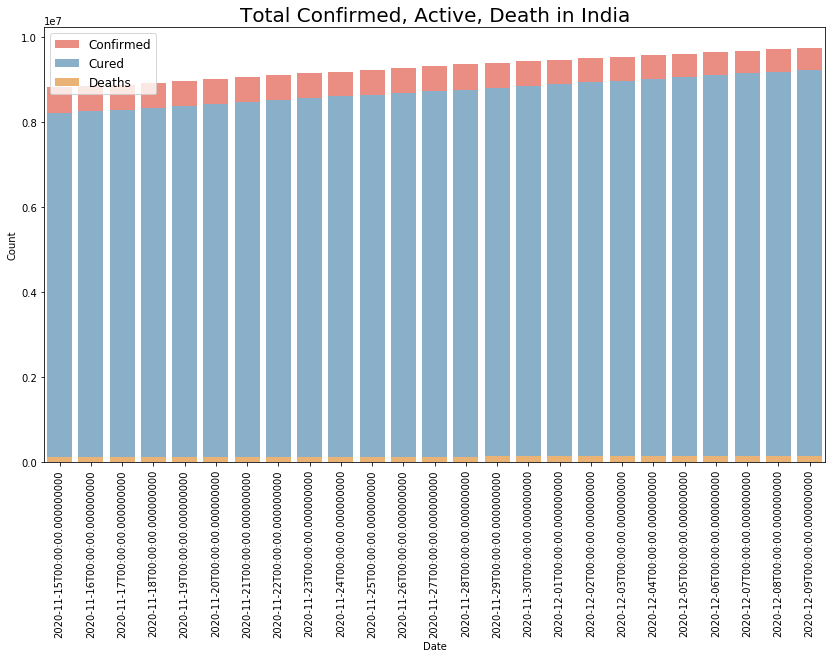

In [36]:
df1=df_confirmed_deaths_cured.reset_index()
df1=df1.groupby('Date').sum()
df1.reset_index(inplace=True)
df2=df1.tail(25)
plt.figure(figsize=(14,8))
sns.barplot(data=df2,x='Date',y='Confirmed',color=sns.color_palette('Set3')[3],label='Confirmed')
sns.barplot(data=df2,x='Date',y='Cured',color=sns.color_palette('Set3')[4],label='Cured')
sns.barplot(data=df2,x='Date',y='Deaths',color=sns.color_palette('Set3')[5],label='Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)
plt.legend(frameon=True,fontsize=12)



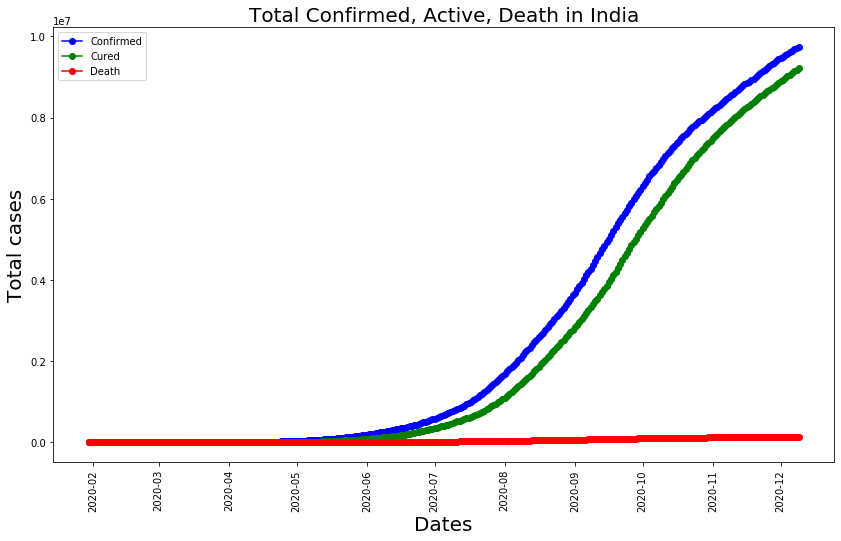

In [37]:
plt.figure(figsize= (14,8))
plt.xticks(rotation = 90 ,fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)

ax1 = plt.plot_date(data=df1,y= 'Confirmed',x= 'Date',label = 'Confirmed',linestyle ='-',color = 'b')
ax2 = plt.plot_date(data=df1,y= 'Cured',x= 'Date',label = 'Cured',linestyle ='-',color = 'g')
ax3 = plt.plot_date(data=df1,y= 'Deaths',x= 'Date',label = 'Death',linestyle ='-',color = 'r')
plt.legend();

In [38]:
state_cases=df_confirmed_deaths_cured.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()
state_cases['Active'] = state_cases['Confirmed'] - abs((state_cases['Deaths']- state_cases['Cured']))
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Confirmed"],2)
state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["Cured"]/state_cases["Confirmed"],2)
state_cases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='Reds',subset=["Confirmed"])\
                        .background_gradient(cmap='Blues',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Cured"])\
                        .background_gradient(cmap='Purples',subset=["Active"])\
                        .background_gradient(cmap='Greys',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Oranges',subset=["Cure Rate (per 100)"])

Text(2020-06-08, 200000, 'Unlock 1.0')

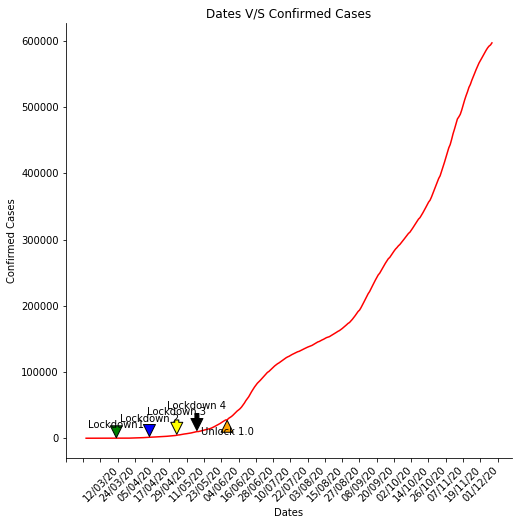

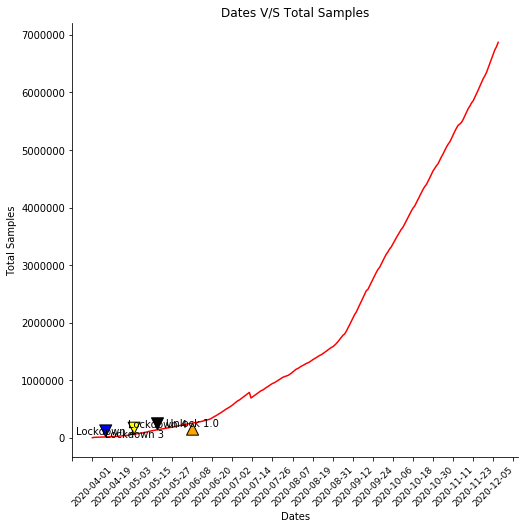

In [40]:
df = pd.read_csv("covid_19_india.csv")
df_delhi = df[(df['State/UnionTerritory']=='Delhi')]
plt.figure(figsize=(8,8))
plt.plot(df_delhi['Date'],df_delhi['Confirmed'],'-r')
plt.rc("xtick",labelsize=9)
plt.rc("ytick",labelsize=10)
ax = plt.gca()
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 12))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=45)
plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')
plt.title('Dates V/S Confirmed Cases')
ax.annotate('Lockdown1', xy =('23/03/20',29), xytext=('23/03/20',15000),ha='center',
                arrowprops = dict(facecolor ='Green',shrink = 0.05),) 
ax.annotate('Lockdown 2', xy =('15/04/20',1561), xytext=('15/04/20',25000),ha='center',
                arrowprops = dict(facecolor ='Blue',shrink = 0.05),) 
ax.annotate('Lockdown 3', xy =('04/05/20',4549), xytext=('04/05/20',35000),ha='center', 
                arrowprops = dict(facecolor ='Yellow',shrink = 0.05),) 
ax.annotate('Lockdown 4', xy =('18/05/20',10054), xytext=('18/05/20',45000),ha='center',
                arrowprops = dict(facecolor ='Black',shrink = 0.05),) 
ax.annotate('Unlock 1.0', xy =('08/06/20',27654), xytext=('08/06/20',5000),ha='center',
                arrowprops = dict(facecolor ='orange',shrink = 0.05),) 


df_test = pd.read_csv("StatewiseTestingDetails.csv")
df_delhi_test=df_test[(df_test['State']=='Delhi')]
plt.figure(figsize=(8,8))
plt.plot(df_delhi_test['Date'],df_delhi_test['TotalSamples'],'-r')
plt.rc("xtick",labelsize=9)
plt.rc("ytick",labelsize=10)
ax = plt.gca()
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 12))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=45)
plt.xlabel('Dates')
plt.ylabel('Total Samples')
plt.title('Dates V/S Total Samples')
ax.annotate('Lockdown 2', xy =('2020-04-15',16605), xytext=('2020-04-15',55000),ha='center',
                arrowprops = dict(facecolor ='Blue',shrink = 0.05),) 
ax.annotate('Lockdown 3', xy =('2020-05-04',64108), xytext=('2020-05-04',15000),ha='center', 
                arrowprops = dict(facecolor ='Yellow',shrink = 0.05),) 
ax.annotate('Lockdown 4', xy =('2020-05-18',139727), xytext=('2020-05-18',185000),ha='center',
                arrowprops = dict(facecolor ='Black',shrink = 0.05),) 
ax.annotate('Unlock 1.0', xy =('2020-06-08',255615), xytext=('2020-06-08',200000),ha='center',
                arrowprops = dict(facecolor ='orange',shrink = 0.05),) 


In [44]:
d=pd.read_csv('StatewiseTestingDetails.csv')
d.groupby('State')['TotalSamples','Positive'].max()

TotalSamples   Positive
State                                                            
Andaman and Nicobar Islands                   140961.0     4773.0
Andhra Pradesh                              10509805.0   235525.0
Arunachal Pradesh                             364420.0     2658.0
Assam                                        5510027.0    87908.0
Bihar                                       15664718.0    90553.0
Chandigarh                                    154396.0     2305.0
Chhattisgarh                                 2828098.0    19459.0
Dadra and Nagar Haveli and Daman and Diu       72410.0     3194.0
Delhi                                        6869328.0   151928.0
Goa                                           363062.0    12333.0
Gujarat                                      8371433.0   136004.0
Haryana                                      3842153.0    76549.0
Himachal Pradesh                              584624.0     3993.0
Jammu and Kashmir                            3218875.0    31371.0
Jharkhand                                    4382789.0   110639.0
Karnataka                                   11878413.0   264546.0
Kerala                                       6702885.0   644698.0
Ladakh                                         97308.0     4720.0
Madhya Pradesh                               3991537.0    50640.0
Maharashtra                                 11377074.0  1638961.0
Manipur                                       439844.0     4765.0
Meghalaya                                     258439.0     1718.0
Mizoram                                       158844.0      713.0
Nagaland                                      124809.0     3558.0
Odisha                                       6214174.0    97920.0
Puducherry                                    425700.0    41562.0
Punjab                                       3395729.0   124535.0
Rajasthan                                    4664755.0    67954.0
Sikkim                                         64280.0      910.0
Tamil Nadu                                  12605289.0   367430.0
Telangana                                    5868233.0   124963.0
Tripura                                       543721.0    32922.0
Uttar Pradesh                               20621452.0   126722.0
Uttarakhand                                  1453671.0    14083.0
West Bengal                                  6211537.0   135596.0

In [47]:
covid_19_india = pd.read_csv('covid_19_india.csv')

In [48]:
covid_19_india.head()

Sno      Date     Time State/UnionTerritory ConfirmedIndianNational  \
0    1  30/01/20  6:00 PM               Kerala                       1   
1    2  31/01/20  6:00 PM               Kerala                       1   
2    3  01/02/20  6:00 PM               Kerala                       2   
3    4  02/02/20  6:00 PM               Kerala                       3   
4    5  03/02/20  6:00 PM               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        0      0       0          1  
1                        0      0       0          1  
2                        0      0       0          2  
3                        0      0       0          3  
4                        0      0       0          3

In [49]:
covid_19_india = covid_19_india.drop(['Sno','Time','ConfirmedIndianNational', 'ConfirmedForeignNational'], axis=1)
covid_19_india = covid_19_india.rename(columns={'State/UnionTerritory':'States','Cured':'Recovered'})

In [50]:
covid_19_india['Active'] = covid_19_india['Confirmed'] - covid_19_india['Recovered'] - covid_19_india['Deaths']

In [51]:
covid_19_india = covid_19_india.sort_values(['Date', 'States']).reset_index(drop=True)
covid_19_india['Date'] = pd.to_datetime(covid_19_india['Date'])

In [52]:
covid_19_india

Date                       States  Recovered  Deaths  Confirmed  \
0    2020-01-02                       Kerala          0       0          2   
1    2020-01-03                       Kerala          0       0          3   
2    2020-01-04  Andaman and Nicobar Islands          0       0         10   
3    2020-01-04               Andhra Pradesh          1       0         83   
4    2020-01-04                        Assam          0       0          1   
...         ...                          ...        ...     ...        ...   
9286 2020-10-31                    Telengana     218887    1336     238632   
9287 2020-10-31                      Tripura      28878     346      30717   
9288 2020-10-31                Uttar Pradesh     448644    7007     480082   
9289 2020-10-31                  Uttarakhand      57270    1011      61915   
9290 2020-10-31                  West Bengal     325888    6784     369671   

      Active  
0          2  
1          3  
2         10  
3         82  
4          1  
...      ...  
9286   18409  
9287    1493  
9288   24431  
9289    3634  
9290   36999  

[9291 rows x 6 columns]

In [53]:
india_wise_cases = covid_19_india[covid_19_india['Date'] == covid_19_india['Date'].max()].copy().fillna(0)
india_wise_cases.index = india_wise_cases["States"]
india_wise_cases = india_wise_cases.drop(['States', 'Date'], axis=1)

In [54]:
df = pd.DataFrame(pd.to_numeric(india_wise_cases.sum()),dtype=np.float64).transpose()
df.style.background_gradient(cmap='summer_r',axis=1)

In [55]:
india_wise_cases.sort_values('Active', ascending= False).style\
    .background_gradient(cmap='BrBG_r', subset=['Confirmed'])\
    .background_gradient(cmap='YlGn_r', subset=["Deaths"])\
    .background_gradient(cmap='YlOrBr',subset=['Recovered'])\
    .background_gradient(cmap='BuPu', subset=['Active'])

In [56]:
def horizontal_bar_chart(df, x, y, title, x_label, y_label, color):
    fig = px.bar(df, x=x, y=y, orientation='h', title=title, 
                 labels={x.name: x_label,
                         y.name: y_label}, color_discrete_sequence=[color])
    fig.update_layout(yaxis={'categoryorder': 'total ascending'})
    fig.show()

In [58]:
cnf, dth, rec, act = '#393e46', '#ff2e63', '#21bf73', '#fe9801'

In [59]:
top_10_confirmed_states = india_wise_cases.sort_values('Confirmed', ascending=False)[:10]
horizontal_bar_chart(top_10_confirmed_states,top_10_confirmed_states.Confirmed, top_10_confirmed_states.index,
                     'Top 10 States with most confirmed cases', 'Number of Confirmed cases (in Thousands)','State Name',cnf)

In [60]:
top_10_death_states = india_wise_cases.sort_values('Deaths',ascending = False)[:10]
horizontal_bar_chart(top_10_death_states,top_10_death_states.Deaths, top_10_death_states.index, 'Top 10 States with most deaths','Number of deaths(In Thousands)','State Name',dth)

In [61]:
last_date = covid_19_india['Date'].max()
print(last_date)

2020-12-11 00:00:00


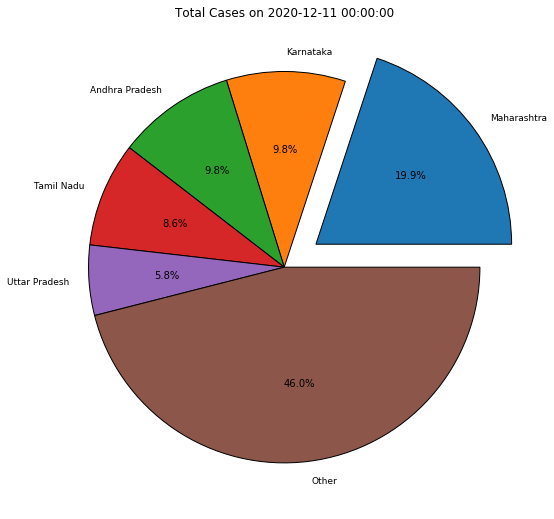

In [62]:
df_last_date = covid_19_india[covid_19_india['Date'] == last_date]
series_last_date = df_last_date.groupby('States')['Confirmed'].sum().sort_values(ascending=False)

labels = []
values = []
state_count = 5
other_total = 0
for state in series_last_date.index:
    if state_count > 0:
        labels.append(state)
        values.append(series_last_date[state])
        state_count -= 1
    else:
        other_total += series_last_date[state]
labels.append("Other")
values.append(other_total)

wedge_dict = {
    'edgecolor': 'black',
    'linewidth': 1        
}

explode = (0.2, 0, 0, 0, 0, 0)
fig = plt.figure(figsize=(15,9))
plt.title(f"Total Cases on {last_date}")
plt.pie(values, labels=labels, explode=explode, autopct='%1.1f%%', wedgeprops=wedge_dict)
plt.show()